In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

file_path = "Metro_Interstate_Traffic_Volume.csv"
traffic_data = pd.read_csv(file_path)

# Basic info about the dataset
traffic_data.info()
traffic_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
# Convert 'date_time' to datetime and extract hour and weekday
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])
traffic_data['hour'] = traffic_data['date_time'].dt.hour
traffic_data['weekday'] = traffic_data['date_time'].dt.weekday

# Transform 'holiday' into a binary flag
traffic_data['is_holiday'] = traffic_data['holiday'].apply(lambda x: 1 if x != 'None' else 0)
traffic_data.drop(columns=['holiday'], inplace=True)

# Normalize continuous variables
continuous_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
scaler = MinMaxScaler()
traffic_data[continuous_features] = scaler.fit_transform(traffic_data[continuous_features])

# Display transformed data
traffic_data.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,weekday,is_holiday
0,0.929726,0.0,0.0,0.40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,0
1,0.933209,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,0
2,0.933918,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,0
3,0.935692,0.0,0.0,0.90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,0
4,0.938949,0.0,0.0,0.75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,0


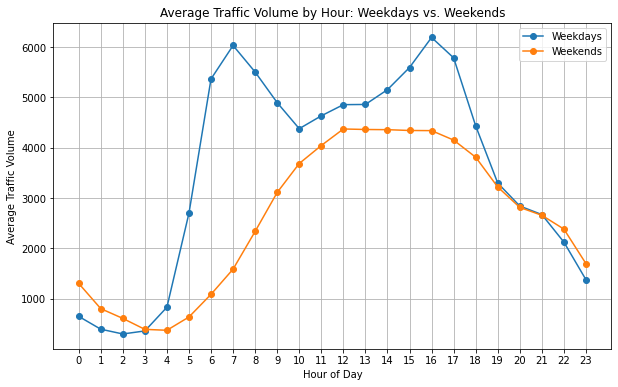

In [3]:
# Traffic volume by hour
hourly_traffic = traffic_data.groupby('hour')['traffic_volume'].mean()

# Traffic volume: weekdays vs. weekends
weekday_data = traffic_data[traffic_data['weekday'] < 5]
weekend_data = traffic_data[traffic_data['weekday'] >= 5]
weekday_hourly = weekday_data.groupby('hour')['traffic_volume'].mean()
weekend_hourly = weekend_data.groupby('hour')['traffic_volume'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekday_hourly.index, weekday_hourly.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly.index, weekend_hourly.values, label='Weekends', marker='o')
plt.title("Average Traffic Volume by Hour: Weekdays vs. Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [4]:
# Define features and target
features = ['hour', 'weekday', 'is_holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']
X = traffic_data[features]
y = traffic_data['traffic_volume']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R2: {r2}")

Linear Regression - MSE: 3318524.6939339684, R2: 0.1606138073534389


In [5]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MSE: 217954.99948056522, R2: 0.944870557233854


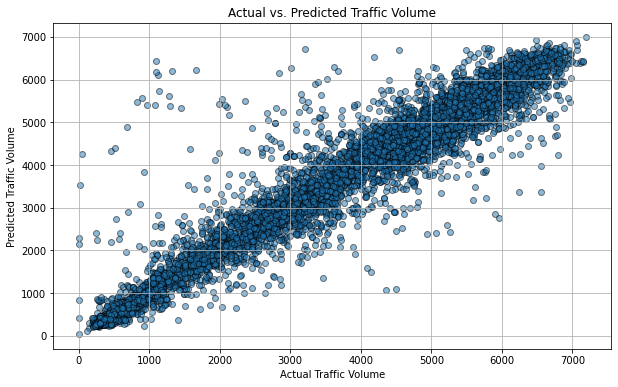

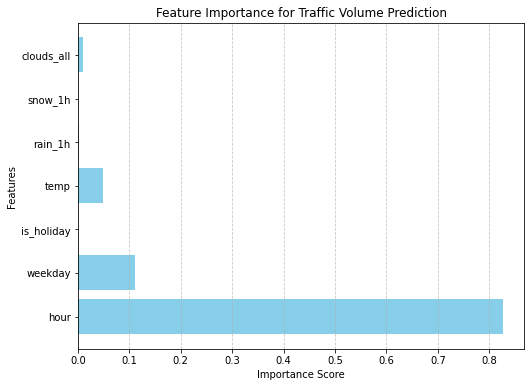

In [6]:
# Actual vs. Predicted Traffic Volume
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, edgecolor='k')
plt.title("Actual vs. Predicted Traffic Volume")
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.grid(True)
plt.show()

# Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance for Traffic Volume Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
